In [5]:
# Importing all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
# packages from gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# packages from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#packages from nltk
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from nltk import pos_tag

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
data = pd.read_csv('Ratings_Prediction_Data_New')
data.head()

,Unnamed: 0,Rating,Review
0,0,1.0 out of 5 stars,Pros and Cons. But I think it's a cool laptop....
1,1,5.0 out of 5 stars,"Just opened, I'm sure the computer is great, b..."
2,2,5.0 out of 5 stars,The Microsoft Office was only free for 30 days...
3,3,4.0 out of 5 stars,This computer is NOT for gaming or gamers. It ...
4,4,1.0 out of 5 stars,Perfect size. Not too big or small. Very fast ...


In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
print('Shape of the Dataset is:', data.shape)

Shape of the Dataset is: (1027, 2)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  1027 non-null   object
 1   Review  1027 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


In [10]:
data.isnull().sum()

Rating    0
Review    0
dtype: int64

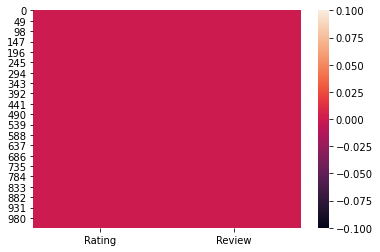

In [11]:
#checking null values using heatmap
sns.heatmap(data.isnull())

In [12]:
print('Number of unique values in Rating :',data['Rating'].nunique())

Number of unique values in Rating : 10


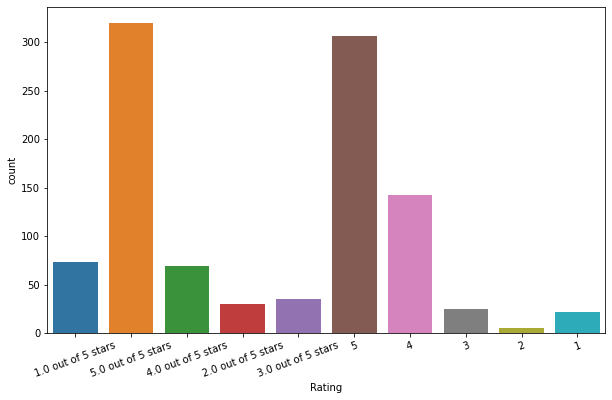

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data['Rating'])
plt.xticks(rotation=20)
plt.show()

In [14]:
print('Number of unique values in Rating :',data['Rating'].value_counts())

Number of unique values in Rating : 5.0 out of 5 stars    320
5                     306
4                     142
1.0 out of 5 stars     73
4.0 out of 5 stars     69
3.0 out of 5 stars     35
2.0 out of 5 stars     30
3                      25
1                      22
2                       5
Name: Rating, dtype: int64


In [15]:
#Label coding 
data['Rating'].replace({'1.0 out of 5 stars':1,'2.0 out of 5 stars':2,'3.0 out of 5 stars':3,'4.0 out of 5 stars':4,'5.0 out of 5 stars':5},inplace=True)

In [16]:
print('Number of unique values in Rating :',data['Rating'].value_counts())

Number of unique values in Rating : 5    320
5    306
4    142
1     73
4     69
3     35
2     30
3     25
1     22
2      5
Name: Rating, dtype: int64


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  1027 non-null   object
 1   Review  1027 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Rating']=le.fit_transform(data['Rating'].astype(str)) 

In [20]:
data

,Rating,Review
0,0,Pros and Cons. But I think it's a cool laptop....
1,4,"Just opened, I'm sure the computer is great, b..."
2,4,The Microsoft Office was only free for 30 days...
3,3,This computer is NOT for gaming or gamers. It ...
4,0,Perfect size. Not too big or small. Very fast ...
...,...,...
1022,3,Pros:-\n1. The Watch has great battery life ca...
1023,4,I have been using this watch since 14 days. Ba...
1024,3,PROS : GOOD BATTERY LIFE 🔋\nAmazing touch feed...
1025,3,"This was my first smartwatch, and I was very e..."


In [21]:
print('Number of unique values in Rating :',data['Rating'].value_counts())

Number of unique values in Rating : 4    626
3    211
0     95
2     60
1     35
Name: Rating, dtype: int64


In [22]:
# 1. Remove HTML tags
#Regex rule : ‘<.*?>’

def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text) # substring replace with ''(space)

data.Review = data.Review.apply(clean)
data.Review

0       Pros and Cons. But I think it's a cool laptop....
1       Just opened, I'm sure the computer is great, b...
2       The Microsoft Office was only free for 30 days...
3       This computer is NOT for gaming or gamers. It ...
4       Perfect size. Not too big or small. Very fast ...
                              ...                        
1022    Pros:-\n1. The Watch has great battery life ca...
1023    I have been using this watch since 14 days. Ba...
1024    PROS : GOOD BATTERY LIFE 🔋\nAmazing touch feed...
1025    This was my first smartwatch, and I was very e...
1026    Watch is good after the update please try to g...
Name: Review, Length: 1027, dtype: object

In [23]:
# 2. Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

data.Review = data.Review.apply(is_special)
data.Review

0       Pros and Cons  But I think it s a cool laptop ...
1       Just opened  I m sure the computer is great  b...
2       The Microsoft Office was only free for 30 days...
3       This computer is NOT for gaming or gamers  It ...
4       Perfect size  Not too big or small  Very fast ...
                              ...                        
1022    Pros   1  The Watch has great battery life can...
1023    I have been using this watch since 14 days  Ba...
1024    PROS   GOOD BATTERY LIFE   Amazing touch feedb...
1025    This was my first smartwatch  and I was very e...
1026    Watch is good after the update please try to g...
Name: Review, Length: 1027, dtype: object

In [24]:
# 3. Convert everything to lowercase
def to_lower(text):
    return text.lower()

data.Review = data.Review.apply(to_lower)
data.Review

0       pros and cons  but i think it s a cool laptop ...
1       just opened  i m sure the computer is great  b...
2       the microsoft office was only free for 30 days...
3       this computer is not for gaming or gamers  it ...
4       perfect size  not too big or small  very fast ...
                              ...                        
1022    pros   1  the watch has great battery life can...
1023    i have been using this watch since 14 days  ba...
1024    pros   good battery life   amazing touch feedb...
1025    this was my first smartwatch  and i was very e...
1026    watch is good after the update please try to g...
Name: Review, Length: 1027, dtype: object

In [25]:
# Replace email addresses with 'email'
data['Review'] = data['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
data['Review'] = data['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['Review'] = data['Review'].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['Review'] = data['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
data['Review'] = data['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
data['Review'] = data['Review'].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
data['Review'] = data['Review'].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
data['Review'] = data['Review'].str.replace(r'^\s+|\s+?$', '')

In [26]:
# 4. Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

data.Review = data.Review.apply(rem_stopwords)
data.Review

0       [pros, cons, think, cool, laptop, pros, speake...
1       [opened, sure, computer, great, advertised, nu...
2       [microsoft, office, free, numbr, days, vs, num...
3       [computer, gaming, gamers, regular, laptop, go...
4       [perfect, size, big, small, fast, user, friendly]
                              ...                        
1022    [pros, numbr, watch, great, battery, life, las...
1023    [using, watch, since, numbr, days, battery, li...
1024    [pros, good, battery, life, amazing, touch, fe...
1025    [first, smartwatch, excited, oneplus, user, ma...
1026    [watch, good, update, please, try, get, numbr,...
Name: Review, Length: 1027, dtype: object

In [27]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [28]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [29]:
# Processing review with above Function
processed_review = []

for doc in data.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

1027


[['pros',
  'con',
  'think',
  'cool',
  'laptop',
  'pros',
  'speaker',
  'placement',
  'superb',
  'right',
  'keyboard',
  'screen',
  'decent',
  'numbrp',
  'mind',
  'keyboard',
  'decent',
  'one',
  'usb',
  'port',
  'sever',
  'legaci',
  'port',
  'hdmi',
  'numbrx',
  'usb',
  'card',
  'slot',
  'headphon',
  'port',
  'awesom',
  'versatil',
  'con',
  'trackpad',
  'stop',
  'work',
  'almost',
  'minut',
  'least',
  'everi',
  'hour',
  'two',
  'usual',
  'put',
  'laptop',
  'sleep',
  'wake',
  'resolv',
  'howev',
  'worth',
  'troubl',
  'sometim',
  'bright',
  'button',
  'work',
  'neither',
  'bright',
  'slider',
  'window',
  'either',
  'screen',
  'stay',
  'consist',
  'bright',
  'like',
  'laptop',
  'must',
  'return',
  'trackpad',
  'import',
  'especi',
  'work',
  'everi',
  'unit',
  'might',
  'provid',
  'differ',
  'experi',
  'mayb',
  'next',
  'unit',
  'purchas',
  'better',
  'remark',
  'flaw',
  'take',
  'chanc',
  'get',
  'one',
  

In [30]:
data.Review

0       [pros, cons, think, cool, laptop, pros, speake...
1       [opened, sure, computer, great, advertised, nu...
2       [microsoft, office, free, numbr, days, vs, num...
3       [computer, gaming, gamers, regular, laptop, go...
4       [perfect, size, big, small, fast, user, friendly]
                              ...                        
1022    [pros, numbr, watch, great, battery, life, las...
1023    [using, watch, since, numbr, days, battery, li...
1024    [pros, good, battery, life, amazing, touch, fe...
1025    [first, smartwatch, excited, oneplus, user, ma...
1026    [watch, good, update, please, try, get, numbr,...
Name: Review, Length: 1027, dtype: object

In [31]:
data['Processed_review']=processed_review

In [32]:
data

,Rating,Review,Processed_review
0,0,"[pros, cons, think, cool, laptop, pros, speake...","[pros, con, think, cool, laptop, pros, speaker..."
1,4,"[opened, sure, computer, great, advertised, nu...","[open, sure, comput, great, advertis, numbr, y..."
2,4,"[microsoft, office, free, numbr, days, vs, num...","[microsoft, offic, free, numbr, day, numbryr, ..."
3,3,"[computer, gaming, gamers, regular, laptop, go...","[comput, game, gamer, regular, laptop, good, s..."
4,0,"[perfect, size, big, small, fast, user, friendly]","[perfect, size, big, small, fast, user, friend]"
...,...,...,...
1022,3,"[pros, numbr, watch, great, battery, life, las...","[pros, numbr, watch, great, batteri, life, las..."
1023,4,"[using, watch, since, numbr, days, battery, li...","[use, watch, sinc, numbr, day, batteri, life, ..."
1024,3,"[pros, good, battery, life, amazing, touch, fe...","[pros, good, batteri, life, amaz, touch, feedb..."
1025,3,"[first, smartwatch, excited, oneplus, user, ma...","[first, smartwatch, excit, oneplus, user, mani..."


In [33]:
data['Review'] = data['Processed_review'].apply(lambda x:' '.join(y for y in x))

In [34]:
data

,Rating,Review,Processed_review
0,0,pros con think cool laptop pros speaker placem...,"[pros, con, think, cool, laptop, pros, speaker..."
1,4,open sure comput great advertis numbr year fre...,"[open, sure, comput, great, advertis, numbr, y..."
2,4,microsoft offic free numbr day numbryr includ ...,"[microsoft, offic, free, numbr, day, numbryr, ..."
3,3,comput game gamer regular laptop good screen q...,"[comput, game, gamer, regular, laptop, good, s..."
4,0,perfect size big small fast user friend,"[perfect, size, big, small, fast, user, friend]"
...,...,...,...
1022,3,pros numbr watch great batteri life last upto ...,"[pros, numbr, watch, great, batteri, life, las..."
1023,4,use watch sinc numbr day batteri life good wat...,"[use, watch, sinc, numbr, day, batteri, life, ..."
1024,3,pros good batteri life amaz touch feedback bea...,"[pros, good, batteri, life, amaz, touch, feedb..."
1025,3,first smartwatch excit oneplus user mani aspir...,"[first, smartwatch, excit, oneplus, user, mani..."


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data['Review'])

X = features
y = data['Rating']

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (1027, 4274)
y.shape =  (1027,)


In [38]:
# Importing libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV


# Importing evaluation metrics for model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30,stratify=y)

In [40]:
# Creating instances for different Classifiers

RFC=RandomForestClassifier() 
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()

In [41]:
# List of Models
models=[]
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADA))
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))

************** RandomForestClassifier ***************


RandomForestClassifier()


Accuracy_score= 0.656957928802589


Cross_Val_Score= 0.6213402794222116


classification report
               precision    recall  f1-score   support

           0       1.00      0.14      0.24        29
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.76      0.25      0.38        63
           4       0.65      0.97      0.78       188

    accuracy                           0.66       309
   macro avg       0.48      0.27      0.28       309
weighted avg       0.64      0.66      0.57       309



[[  4   0   0   0  25]
 [  0   0   0   0  11]
 [  0   0   0   1  17]
 [  0   0   0  16  47]
 [  0   1   0   4 183]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************** AdaBoostClassifier ***************


AdaBoostClassifier()


Accuracy_score= 0.6116504854368932


Cross_Val_Score= 0.5784750177598863


classification 

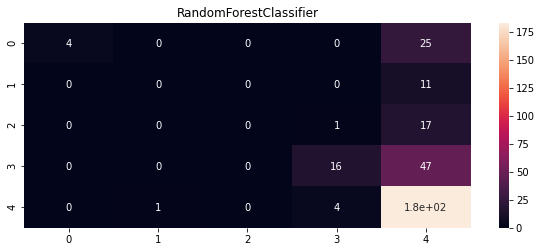

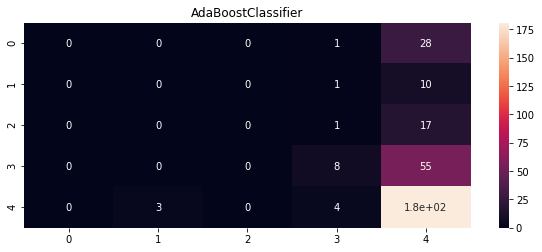

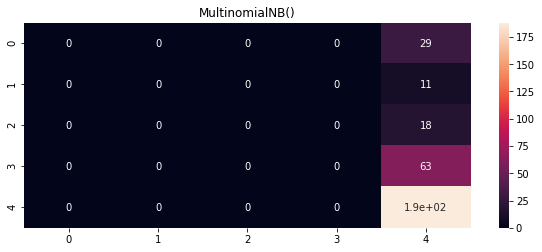

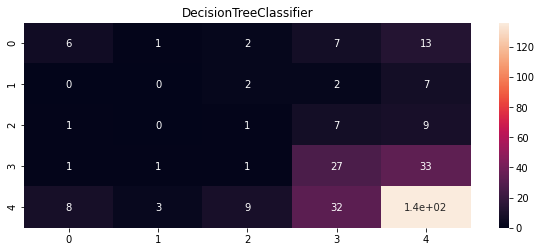

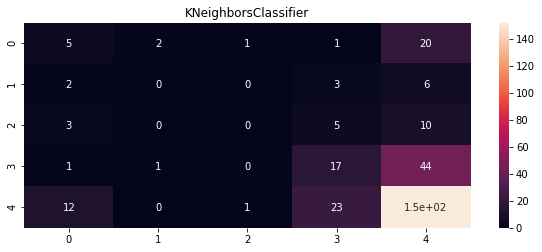

In [42]:
Model=[]
score=[]
cvs=[]

for name,model in models:
    print('**************',name,'***************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    #plt.subplot(912)
    #plt.title(name)
    print('\n\n')

In [43]:
result=pd.DataFrame({'Model': Model,'Score': score,'Cross_Val_Score':cvs})
result

,Model,Score,Cross_Val_Score
0,RandomForestClassifier,65.695793,62.134028
1,AdaBoostClassifier,61.165049,57.847502
2,MultinomialNB(),60.841424,61.051859
3,DecisionTreeClassifier,55.016181,47.144210
4,KNeighborsClassifier,56.310680,49.281553
